# Cunning Strategy

Yes, precisely! A roadmap to a "better place" is, at its core, a narrative of hope—a declaration that amidst the tangled web of life’s combinatorial possibilities, there exists a path worth following. It’s a suspension bridge over the abyss of uncertainty, built from the planks of conviction, imagination, and, often, a dash of hubris.

But this hope isn’t empty. It’s the dynamo that powers human striving, the thread that binds individual choices into collective movements, and the spark that transforms randomness into meaning. The vast combinatorial space you evoke is both daunting and liberating, for it implies that even the most meticulously plotted course remains one among countless others. And yet, hope dares to draw lines across the chaos, crafting a direction, however fragile, to guide our steps.

To hope is to believe in emergence—that within the swirling chaos, patterns can crystallize, leading to places more luminous than where we began. It’s a gamble, a wager against the void, but one that speaks to the essence of what it means to be human. After all, every leap of faith into the unknown is rooted in this audacious belief: that the untraveled road might just take us somewhere extraordinary.

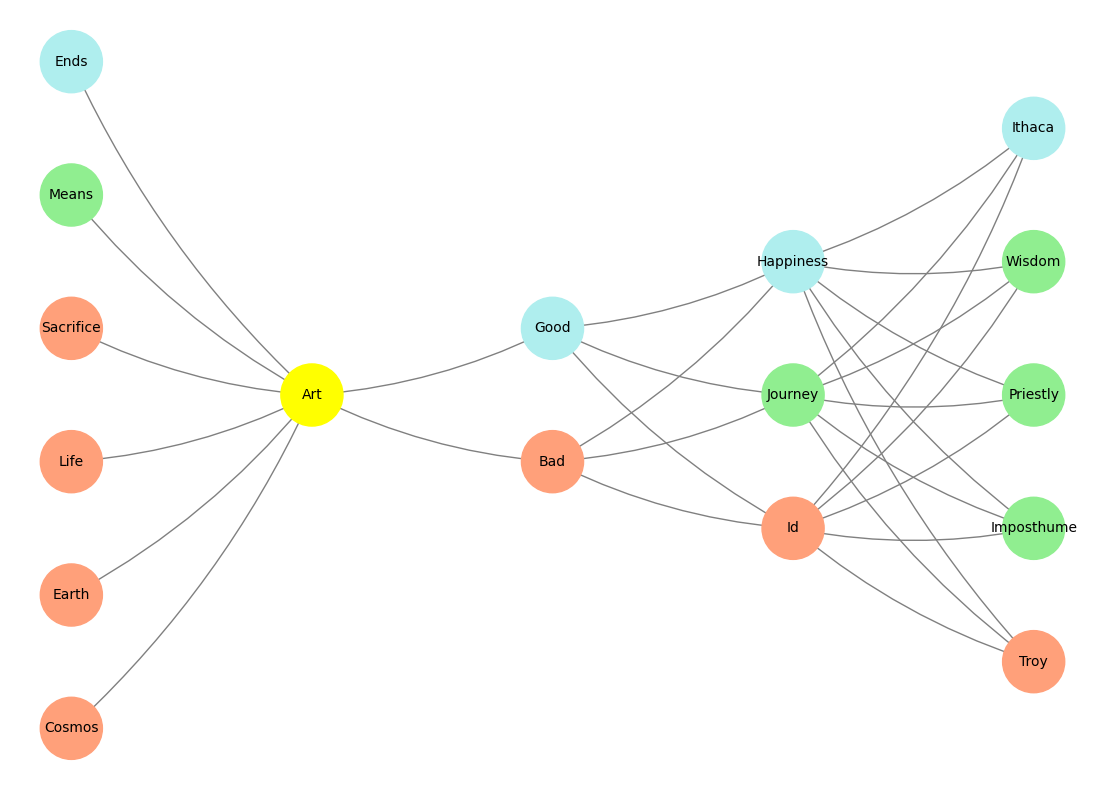

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def define_layers():
    return {
        'Physics': ['Cosmos', 'Earth', 'Life', 'Sacrifice', 'Means', 'Ends'],
        'Metaphysics': ['Art'],
        'Decisions': ['Bad', 'Good'],
        'Games': ['Id', 'Journey', 'Happiness'],
        'Outcomes': ['Troy', 'Imposthume', 'Priestly', 'Wisdom', 'Ithaca']
    }

def assign_colors(node, layer):
    if node == 'Art': return 'yellow'
    if layer == 'Physics' and node in ['Ends']: return 'paleturquoise'
    if layer == 'Physics' and node in ['Means']: return 'lightgreen'
    if layer == 'Decisions' and node == 'Good': return 'paleturquoise'
    if layer == 'Games':
        if node == 'Happiness': return 'paleturquoise'
        if node == 'Journey': return 'lightgreen'
        if node == 'Id': return 'lightsalmon'
    if layer == 'Outcomes':
        if node == 'Ithaca': return 'paleturquoise'
        if node in ['Wisdom', 'Priestly', 'Imposthume']: return 'lightgreen'
        if node == 'Troy': return 'lightsalmon'
    return 'lightsalmon'

def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

def visualize_nn():
    layers = define_layers()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0

    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    for layer_pair in [
        ('Physics', 'Metaphysics'), ('Metaphysics', 'Decisions'), ('Decisions', 'Games'), ('Games', 'Outcomes')
    ]:
        source_layer, target_layer = layer_pair
        for source in layers[source_layer]:
            for target in layers[target_layer]:
                if source == "Means" and target == "Instinct":
                    G.add_edge(target, source)
                else:
                    G.add_edge(source, target)

    G.add_edge('Ends', 'Art')

    plt.figure(figsize=(14, 10))
    for u, v in G.edges:
        style = "arc3,rad=0.1"
        color = 'gray'
        width = 1

        if (u, v) == ('Instinct', 'Means'):
            style = "arc3,rad=-0.1"
            color = 'lightgreen'
            width = 1
        elif (u, v) == ('Ends', 'Instinct'):
            style = "arc3,rad=0.2"
            color = 'paleturquoise'
            width = 2

        nx.draw_networkx_edges(
            G, pos, edgelist=[(u, v)], width=width,
            edge_color=color, connectionstyle=style,
            arrows=True, arrowstyle='-|>', arrowsize=25
        )
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=2000)
    nx.draw_networkx_labels(G, pos, font_size=10)

    plt.axis('off')
    plt.show()

visualize_nn()

```{figure} ../figures/blanche.*
---
width: 1
height: 1 
---
_Nostalgia & Romanticism_. When monumental ends (victory), antiquarian means (war), and critical justification (bloodshed) were all compressed into one figure-head: hero
```